In [6]:
# Chapter 8: The Basics of Decision Trees

# Import required libraries
import numpy as np  # For numerical operations
import pandas as pd  # For handling datasets
from ISLP import load_data, confusion_table  # For dataset loading and confusion matrix
from sklearn.tree import DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR, plot_tree  # Decision trees
from sklearn.ensemble import RandomForestRegressor as RF, GradientBoostingRegressor as GBR  # Bagging and Boosting
from sklearn.metrics import accuracy_score, log_loss  # Evaluation metrics
import sklearn.model_selection as skm  # For model selection
from patsy import dmatrix as MS  # For model matrix creation
import matplotlib.pyplot as plt  # For plotting

In [7]:
# ----------------------------
# 8.3.1 Fitting Classification Trees
# ----------------------------

Carseats = load_data('Carseats')  # Load the Carseats dataset
High = np.where(Carseats.Sales > 8, "Yes", "No")  # Create binary target variable 'High'

In [8]:
# Create model matrix from predictor variables (excluding 'Sales')
model = MS('~ ' + ' + '.join(Carseats.columns.drop('Sales')), Carseats, return_type='dataframe')
X = np.asarray(model)  # Convert to numpy array
feature_names = model.design_info.column_names  # Save feature names

In [9]:
# Fit classification tree with entropy criterion and max depth of 3
clf = DTC(criterion='entropy', max_depth=3, random_state=0)
clf.fit(X, High)  # Fit the model


,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [10]:
print("Training Accuracy:", accuracy_score(High, clf.predict(X)))  # Accuracy on training data

Training Accuracy: 0.79


In [11]:
resid_dev = np.sum(log_loss(High, clf.predict_proba(X)))  # Compute residual deviance (log loss)
print("Residual Deviance:", resid_dev)


Residual Deviance: 0.47106470626493574


In [12]:
# Split data into training and test sets
X_train, X_test, High_train, High_test = skm.train_test_split(X, High, test_size=0.5, random_state=0)


In [13]:
# Fit tree on training data
clf = DTC(criterion='entropy', random_state=0)
clf.fit(X_train, High_train)
print("Test Accuracy:", accuracy_score(High_test, clf.predict(X_test)))


Test Accuracy: 0.725


In [14]:
# Cost complexity pruning path
ccp_path = clf.cost_complexity_pruning_path(X_train, High_train)

In [15]:
# Cross-validation with grid search to find best ccp_alpha
kfold = skm.KFold(10, random_state=1, shuffle=True)
grid = skm.GridSearchCV(clf, {'ccp_alpha': ccp_path.ccp_alphas}, refit=True, cv=kfold, scoring='accuracy')
grid.fit(X_train, High_train)
print("Best Cross-Validated Accuracy:", grid.best_score_)

Best Cross-Validated Accuracy: 0.685


In [16]:
best_ = grid.best_estimator_  # Best pruned tree


[Text(0.4345703125, 0.95, 'Price <= 94.5\nentropy = 0.977\nsamples = 200\nvalue = [118, 82]\nclass = No'),
 Text(0.1875, 0.85, 'CompPrice <= 118.5\nentropy = 0.769\nsamples = 40\nvalue = [9, 31]\nclass = Yes'),
 Text(0.31103515625, 0.8999999999999999, 'True  '),
 Text(0.15625, 0.75, 'Price <= 86.5\nentropy = 0.894\nsamples = 29\nvalue = [9, 20]\nclass = Yes'),
 Text(0.09375, 0.65, 'Income <= 60.0\nentropy = 0.523\nsamples = 17\nvalue = [2, 15]\nclass = Yes'),
 Text(0.0625, 0.55, 'ShelveLoc[T.Good] <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]\nclass = Yes'),
 Text(0.03125, 0.45, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = No'),
 Text(0.09375, 0.45, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Yes'),
 Text(0.125, 0.55, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]\nclass = Yes'),
 Text(0.21875, 0.65, 'Population <= 212.5\nentropy = 0.98\nsamples = 12\nvalue = [7, 5]\nclass = No'),
 Text(0.1875, 0.55, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No'),
 Tex

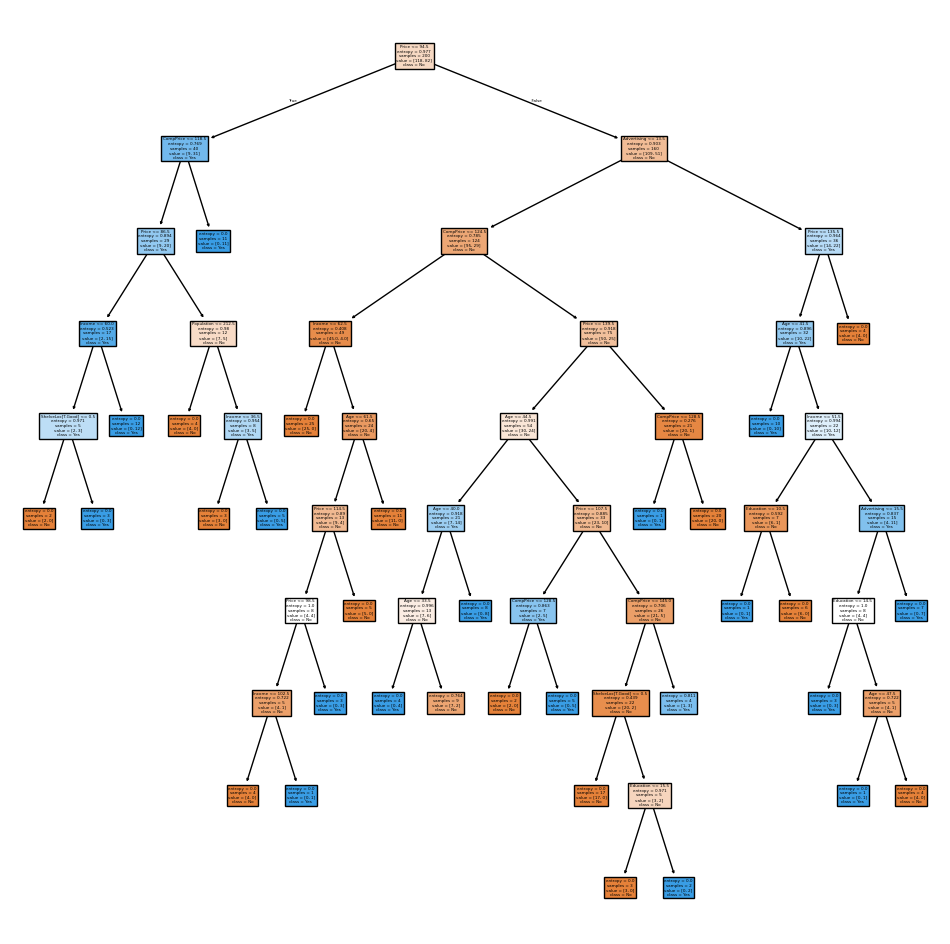

In [17]:
# Plot the best pruned tree
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(best_, feature_names=feature_names, class_names=["No", "Yes"], filled=True, ax=ax)


In [18]:
print("Number of Terminal Nodes:", best_.tree_.n_leaves)  # Number of leaves
print("Test Accuracy (Pruned Tree):", accuracy_score(High_test, best_.predict(X_test)))  # Accuracy
print(confusion_table(best_.predict(X_test), High_test))  # Confusion matrix


Number of Terminal Nodes: 32
Test Accuracy (Pruned Tree): 0.725
Truth      No  Yes
Predicted         
No         94   31
Yes        24   51


In [19]:
# ----------------------------
# 8.3.2 Fitting Regression Trees
# ----------------------------

Boston = load_data("Boston")  # Load Boston housing dataset
model = MS(Boston.columns.drop('medv'), Boston, return_type='dataframe')  # Create feature matrix
D = model
feature_names = list(D.columns)  # Get feature names
X = np.asarray(D)
y = Boston['medv']  # Target variable


In [21]:
from patsy import dmatrix as MS

# Drop 'medv' and build formula string
formula = '~ ' + ' + '.join(Boston.columns.drop('medv'))

# Create the design matrix correctly from formula and data
model = MS(formula, data=Boston, return_type='dataframe')


In [22]:
X = np.asarray(model)
y = Boston['medv']


In [24]:
# Split data into train/test sets
X_train, X_test, y_train, y_test = skm.train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
# Fit regression tree
reg = DTR(max_depth=3)
reg.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [27]:
model = MS(formula, data=Boston, return_type='dataframe')


In [28]:
model = MS(formula, data=Boston, return_type='dataframe')
feature_names = model.design_info.column_names  # ✅ correct and safe
X = np.asarray(model)


[Text(0.5, 0.875, 'rm <= 6.797\nsquared_error = 84.765\nsamples = 354\nvalue = 22.745'),
 Text(0.25, 0.625, 'lstat <= 14.405\nsquared_error = 35.011\nsamples = 284\nvalue = 19.614'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'dis <= 1.474\nsquared_error = 20.776\nsamples = 167\nvalue = 22.981'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 50.0'),
 Text(0.1875, 0.125, 'squared_error = 12.072\nsamples = 165\nvalue = 22.653'),
 Text(0.375, 0.375, 'crim <= 5.782\nsquared_error = 16.049\nsamples = 117\nvalue = 14.808'),
 Text(0.3125, 0.125, 'squared_error = 10.345\nsamples = 67\nvalue = 16.872'),
 Text(0.4375, 0.125, 'squared_error = 10.334\nsamples = 50\nvalue = 12.042'),
 Text(0.75, 0.625, 'rm <= 7.435\nsquared_error = 85.388\nsamples = 70\nvalue = 35.451'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'crim <= 7.393\nsquared_error = 44.147\nsamples = 47\nvalue = 30.921'),
 Text(0.5625, 0.125, 'squared_error = 19.597\nsamples = 43\nvalue = 32.465'),
 Text

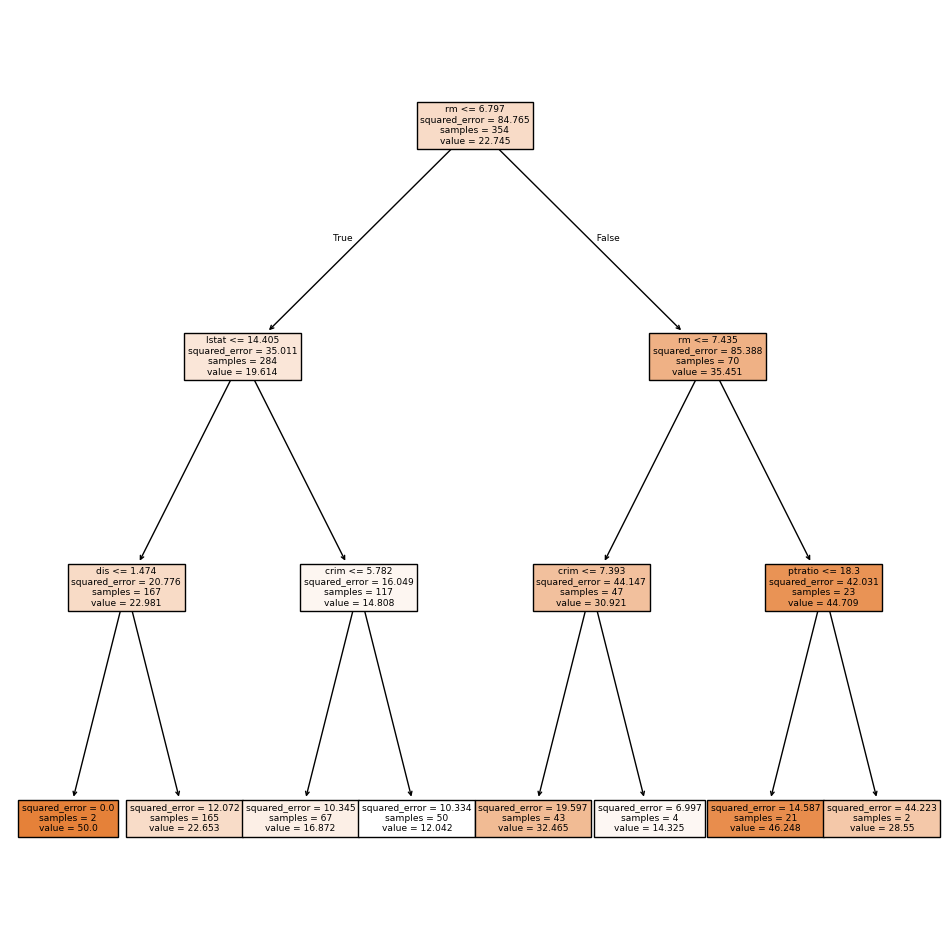

In [29]:
# Plot regression tree
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(reg, feature_names=feature_names, filled=True, ax=ax)


In [30]:
# Perform cost-complexity pruning
ccp_path = reg.cost_complexity_pruning_path(X_train, y_train)
kfold = skm.KFold(5, shuffle=True, random_state=10)
grid = skm.GridSearchCV(reg, {'ccp_alpha': ccp_path.ccp_alphas}, refit=True, cv=kfold, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

,estimator,DecisionTreeR...r(max_depth=3)
,param_grid,{'ccp_alpha': array([ 0. ... 39.79182618])}
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [31]:
best_ = grid.best_estimator_  # Best tree after pruning
mse = np.mean((y_test - best_.predict(X_test)) ** 2)  # Mean squared error
print("Test MSE (Pruned Tree):", mse)

Test MSE (Pruned Tree): 28.069857549754044


[Text(0.5, 0.875, 'rm <= 6.797\nsquared_error = 84.765\nsamples = 354\nvalue = 22.745'),
 Text(0.25, 0.625, 'lstat <= 14.405\nsquared_error = 35.011\nsamples = 284\nvalue = 19.614'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'dis <= 1.474\nsquared_error = 20.776\nsamples = 167\nvalue = 22.981'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 50.0'),
 Text(0.1875, 0.125, 'squared_error = 12.072\nsamples = 165\nvalue = 22.653'),
 Text(0.375, 0.375, 'crim <= 5.782\nsquared_error = 16.049\nsamples = 117\nvalue = 14.808'),
 Text(0.3125, 0.125, 'squared_error = 10.345\nsamples = 67\nvalue = 16.872'),
 Text(0.4375, 0.125, 'squared_error = 10.334\nsamples = 50\nvalue = 12.042'),
 Text(0.75, 0.625, 'rm <= 7.435\nsquared_error = 85.388\nsamples = 70\nvalue = 35.451'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'crim <= 7.393\nsquared_error = 44.147\nsamples = 47\nvalue = 30.921'),
 Text(0.5625, 0.125, 'squared_error = 19.597\nsamples = 43\nvalue = 32.465'),
 Text

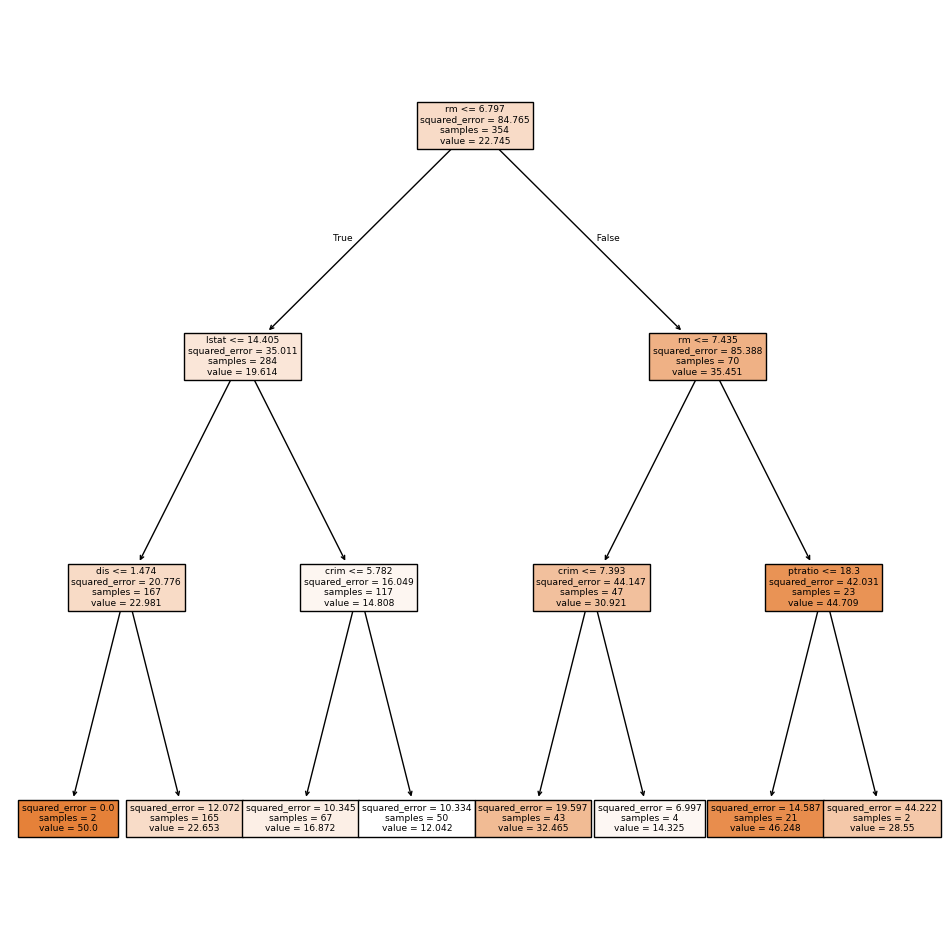

In [32]:
# Plot pruned tree
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(best_, feature_names=feature_names, filled=True, ax=ax)


In [33]:
# ----------------------------
# 8.3.3 Bagging and Random Forests
# ----------------------------

# Bagging model using all features
bag_boston = RF(max_features=X_train.shape[1], random_state=0)
bag_boston.fit(X_train, y_train)
y_hat_bag = bag_boston.predict(X_test)
print("Test MSE (Bagging):", np.mean((y_test - y_hat_bag) ** 2))


Test MSE (Bagging): 14.310916815789474


In [34]:
# Bagging with 500 trees
bag_boston = RF(max_features=X_train.shape[1], n_estimators=500, random_state=0)
bag_boston.fit(X_train, y_train)
y_hat_bag = bag_boston.predict(X_test)
print("Test MSE (Bagging 500 trees):", np.mean((y_test - y_hat_bag) ** 2))


Test MSE (Bagging 500 trees): 14.617150884999996


In [35]:
# Random forest using 6 features per split
RF_boston = RF(max_features=6, random_state=0)
RF_boston.fit(X_train, y_train)
y_hat_RF = RF_boston.predict(X_test)
print("Test MSE (Random Forest):", np.mean((y_test - y_hat_RF) ** 2))

Test MSE (Random Forest): 16.713916157894737


In [36]:
# Feature importance from random forest
feature_imp = pd.DataFrame({'importance': RF_boston.feature_importances_}, index=feature_names)
feature_imp = feature_imp.sort_values(by='importance', ascending=False)
print("Feature Importance:\n", feature_imp)

Feature Importance:
            importance
lstat        0.354562
rm           0.336383
crim         0.059604
ptratio      0.053330
indus        0.048795
nox          0.046143
dis          0.040505
age          0.025759
tax          0.021474
rad          0.005752
zn           0.005048
chas         0.002646
Intercept    0.000000


In [37]:
# ----------------------------
# 8.3.4 Boosting (Substitute for BART)
# ----------------------------

# Fit gradient boosting regressor
boost_boston = GBR(n_estimators=5000, learning_rate=0.2, max_depth=3, random_state=0)
boost_boston.fit(X_train, y_train)
y_hat_boost = boost_boston.predict(X_test)
print("Test MSE (Boosting):", np.mean((y_test - y_hat_boost) ** 2))

Test MSE (Boosting): 14.42086329328669


In [38]:
# Plot training and test error across iterations
test_error = np.zeros_like(boost_boston.train_score_)
for idx, y_ in enumerate(boost_boston.staged_predict(X_test)):
    test_error[idx] = np.mean((y_test - y_) ** 2)


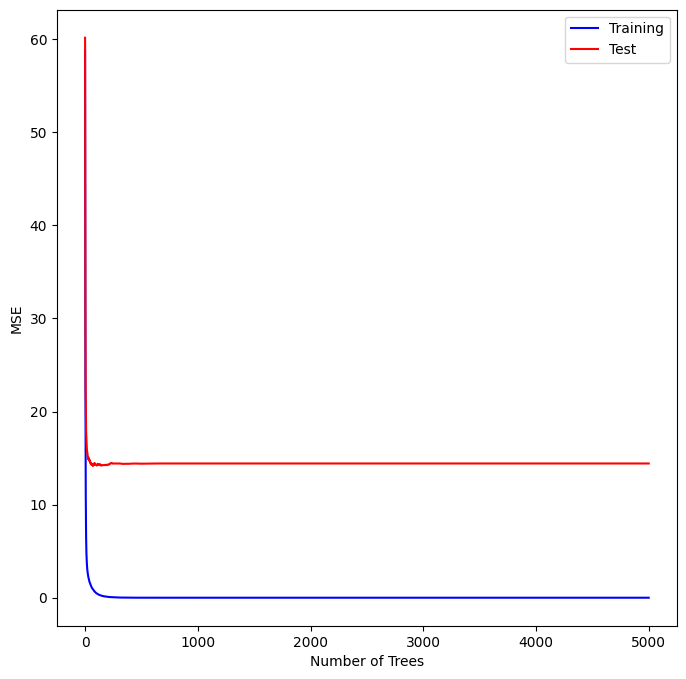

In [39]:
plot_idx = np.arange(boost_boston.train_score_.shape[0])
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(plot_idx, boost_boston.train_score_, 'b', label='Training')
ax.plot(plot_idx, test_error, 'r', label='Test')
ax.set_ylabel("MSE")
ax.set_xlabel("Number of Trees")
ax.legend()
plt.show()
